Found 60000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Epoch 1/10


c:\Users\skshi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8917 - loss: 0.3435 - val_accuracy: 0.9833 - val_loss: 0.0477
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9842 - loss: 0.0526 - val_accuracy: 0.9815 - val_loss: 0.0574
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9888 - loss: 0.0350 - val_accuracy: 0.9896 - val_loss: 0.0334
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9914 - loss: 0.0263 - val_accuracy: 0.9890 - val_loss: 0.0341
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9933 - loss: 0.0199 - val_accuracy: 0.9895 - val_loss: 0.0370
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9951 - loss: 0.0160 - val_accuracy: 0.9912 - val_loss: 0.0335
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9958 - loss: 0.0125 - val_accuracy: 0.9891 - val_loss: 0.0405
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9963 - loss: 0.01

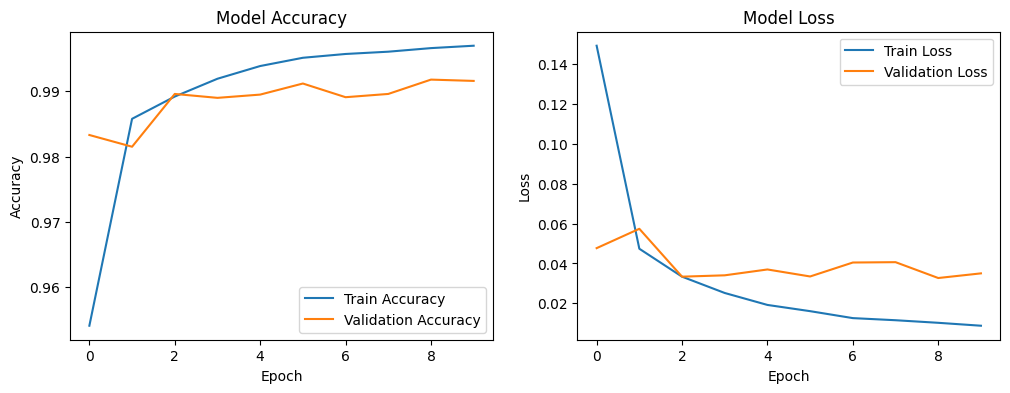

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


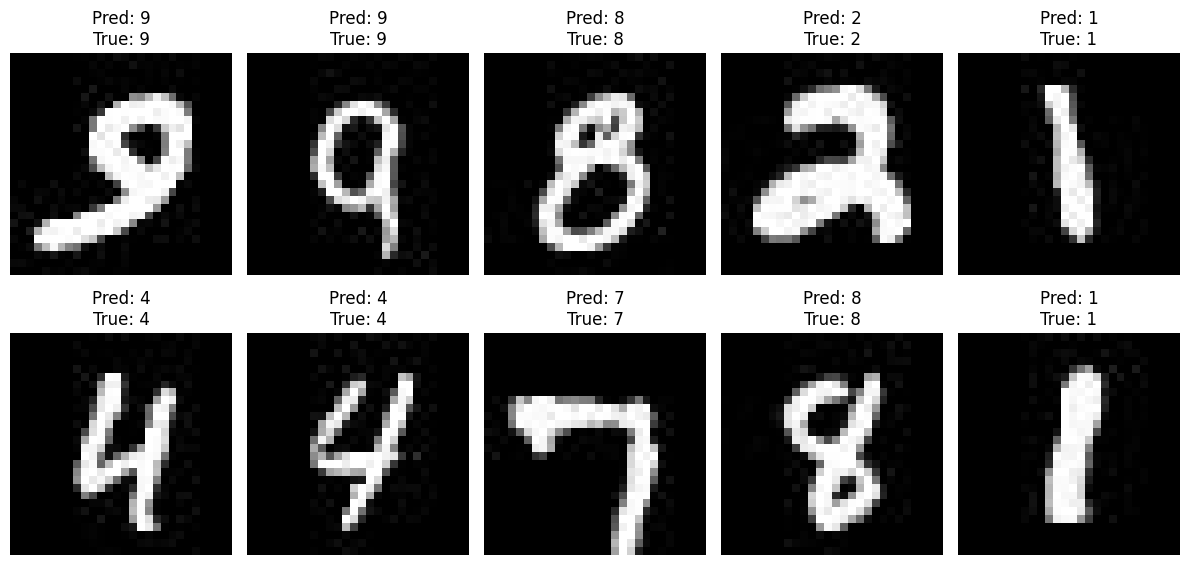

In [1]:
# a. Import necessary packages
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load image data from directories
train_dir = 'mnist-jpg/train'
test_dir = 'mnist-jpg/test'

# Load training and testing data using image_dataset_from_directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    label_mode='int'  # Integer labels for sparse categorical crossentropy
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    label_mode='int'
)

# Normalize pixel values to [0,1]
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(normalize)
test_ds = test_ds.map(normalize)

# b. Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# c. Train the model
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

# d. Evaluate the model’s performance
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

# e. Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# f. Making predictions on the test images and displaying results
import numpy as np

# Take one batch from the test dataset
for test_images, test_labels in test_ds.take(1):
    predictions = model.predict(test_images)
    num_images_to_display = 10
    plt.figure(figsize=(12, 6))
    for i in range(num_images_to_display):
        plt.subplot(2, 5, i + 1)
        plt.imshow(tf.squeeze(test_images[i]), cmap='gray')  # Squeeze to remove channel dimension
        plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {test_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
